<a href="https://colab.research.google.com/github/syilmazs/Pandas/blob/main/ChampionsLeague_Mentoring_30_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv("Sampiyonlar Ligi 55-16.csv")
df

,Stage,Round,Group,Date,Team 1,FT,HT,Team 2,∑FT,ET,P,Comments,Adj Date,Year,Home Team,Home Team Ctry,Away Team,Away Team Ctry,Home Goal Count,Away Goal Count
0,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),Inter Baku PIK › AZE (1),0-0,0-0,Rabotnicki › MKD (1),NaN,NaN,NaN,NaN,2008-07-15,2008,Inter Baku PIK,AZE,Rabotnicki,MKD,0,0
1,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),Anorthosis Famagusta › CYP (1),1-0,0-0,Pyunik › ARM (1),NaN,NaN,NaN,NaN,2008-07-15,2008,Anorthosis Famagusta,CYP,Pyunik,ARM,1,0
2,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),BATE Borisov › BLR (1),2-0,0-0,Valur Reykjavik › ISL (1),NaN,NaN,NaN,NaN,2008-07-15,2008,BATE Borisov,BLR,Valur Reykjavik,ISL,2,0
3,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),Tampere United › FIN (1),2-1,0-0,Buducnost › MNE (1),NaN,NaN,NaN,NaN,2008-07-15,2008,Tampere United,FIN,Buducnost,MNE,2,1
4,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),Dinamo Tirana › ALB (1),0-2,0-0,FK Modrica › BIH (1),NaN,NaN,NaN,NaN,2008-07-15,2008,Dinamo Tirana,ALB,FK Modrica,BIH,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,NaN,Semifinals | Leg 1,NaN,(Wed) 6 Apr 1983 (W14),Juventus › ITA (7),2-0,1-0,Widzew Lodz › POL (7),NaN,NaN,NaN,NaN,1983-04-06,1983,Juventus,ITA,Widzew Lodz,POL,2,0
6550,NaN,Semifinals | Leg 1,NaN,(Wed) 6 Apr 1983 (W14),Real Sociedad › ESP (7),1-1,0-0,Hamburger SV › GER (5),NaN,NaN,NaN,NaN,1983-04-06,1983,Real Sociedad,ESP,Hamburger SV,GER,1,1
6551,NaN,Semifinals | Leg 2,NaN,(Wed) 20 Apr 1983 (W16),Hamburger SV › GER (6),2-1,0-0,Real Sociedad › ESP (8),3-2 (agg.),NaN,NaN,NaN,1983-04-20,1983,Hamburger SV,GER,Real Sociedad,ESP,2,1
6552,NaN,Semifinals | Leg 2,NaN,(Wed) 20 Apr 1983 (W16),Widzew Lodz › POL (8),2-2,0-1,Juventus › ITA (8),2-4 (agg.),NaN,NaN,NaN,1983-04-20,1983,Widzew Lodz,POL,Juventus,ITA,2,2


In [3]:
df.shape

(6554, 20)

In [34]:
df["Stage"].unique()

array(['Qualifying', 'Group', 'Knockout', 'Group 1st', 'Group 2nd', nan],
      dtype=object)

In [5]:
df.describe()

,Year,Home Goal Count,Away Goal Count
count,6554.000000,6554.000000,6554.000000
mean,1994.921727,1.754501,1.061794
std,16.638667,1.577249,1.208468
min,1955.000000,0.000000,0.000000
25%,1983.000000,1.000000,0.000000
50%,2000.000000,1.000000,1.000000
75%,2008.000000,3.000000,2.000000
max,2016.000000,11.000000,12.000000


In [35]:
df["Round"].unique()

array(['Qual. Round 1 | Leg 1', 'Qual. Round 1 | Leg 2',
       'Qual. Round 2 | Leg 1', 'Qual. Round 2 | Leg 2',
       'Qual. Round 3 | Leg 1', 'Qual. Round 3 | Leg 2', 'Matchday ?',
       'Round of 16 | Leg 1', 'Round of 16 | Leg 2',
       'Quarterfinals | Leg 1', 'Quarterfinals | Leg 2',
       'Semifinals | Leg 1', 'Semifinals | Leg 2', 'Final',
       'Playoff Round | Leg 1', 'Playoff Round | Leg 2',
       'Round 1 | Leg 1', 'Round 1 | Leg 2', 'Round 1 | Replay',
       'Quarterfinals | Replay', 'Round of 16 | Replay',
       'Prelim. Round | Leg 1', 'Prelim. Round | Leg 2',
       'Round 2 | Leg 1', 'Round 2 | Leg 2', 'Final | Replay',
       'Semifinals', 'Semifinals | Replay'], dtype=object)

In [15]:
final = df[df["Round"]=="Final"]  # Final maçlarını içeren bir dataset oluşturduk.
final

,Stage,Round,Group,Date,Team 1,FT,HT,Team 2,∑FT,ET,P,Comments,Adj Date,Year,Home Team,Home Team Ctry,Away Team,Away Team Ctry,Home Goal Count,Away Goal Count
212,Knockout,Final,NaN,(Wed) 27 May 2009 (W21),FC Barcelona › ESP (15),2-0,0-0,Manchester United FC › ENG (13),NaN,NaN,NaN,NaN,2009-05-27,2009,FC Barcelona,ESP,Manchester United FC,ENG,2,0
449,Knockout,Final,NaN,(Wed) 28 May 2003 (W21),AC Milan › ITA (19),0-0 (*),0-0,Juventus › ITA (17),NaN,0-0 (a.e.t.),3-2 (pen.),NaN,2003-05-28,2003,AC Milan,ITA,Juventus,ITA,0,0
664,Knockout,Final,NaN,(Sat) 6 Jun 2015 (W22),FC Barcelona › ESP (13),3-1,0-0,Juventus › ITA (13),NaN,NaN,NaN,NaN,2015-06-06,2015,FC Barcelona,ESP,Juventus,ITA,3,1
727,NaN,Final,NaN,(Thu) 27 May 1965 (W21),Internazionale › ITA (7),1-0,0-0,SL Benfica › POR (9),NaN,NaN,NaN,NaN,1965-05-27,1965,Internazionale,ITA,SL Benfica,POR,1,0
932,Knockout,Final,NaN,(Wed) 26 May 2004 (W21),FC Porto › POR (13),3-0,0-0,AS Monaco › FRA (13),NaN,NaN,NaN,NaN,2004-05-26,2004,FC Porto,POR,AS Monaco,FRA,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,NaN,Final,NaN,(Wed) 29 May 1991 (W21),Crvena Zvezda › SRB (9),0-0 (*),0-0,Olympique Marseille › FRA (9),NaN,0-0 (a.e.t.),5-3 (pen.),NaN,1991-05-29,1991,Crvena Zvezda,SRB,Olympique Marseille,FRA,0,0
6288,Knockout,Final,NaN,(Sat) 24 May 2014 (W20),Real Madrid CF › ESP (13),1-1 (*),0-0,Atletico Madrid › ESP (13),NaN,4-1 (a.e.t.),NaN,NaN,2014-05-24,2014,Real Madrid CF,ESP,Atletico Madrid,ESP,1,1
6435,Knockout,Final,NaN,(Wed) 20 May 1998 (W20),Real Madrid CF › ESP (11),1-0,0-0,Juventus › ITA (11),NaN,NaN,NaN,NaN,1998-05-20,1998,Real Madrid CF,ESP,Juventus,ITA,1,0
6494,NaN,Final,NaN,(Wed) 24 May 1989 (W21),AC Milan › ITA (9),4-0,0-0,Steaua Bucuresti › ROU (9),NaN,NaN,NaN,NaN,1989-05-24,1989,AC Milan,ITA,Steaua Bucuresti,ROU,4,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Stage            4294 non-null   object
 1   Round            6554 non-null   object
 2   Group            2184 non-null   object
 3   Date             6554 non-null   object
 4   Team 1           6554 non-null   object
 5   FT               6554 non-null   object
 6   HT               6554 non-null   object
 7   Team 2           6554 non-null   object
 8   ∑FT              2134 non-null   object
 9   ET               128 non-null    object
 10  P                56 non-null     object
 11  Comments         149 non-null    object
 12  Adj Date         6554 non-null   object
 13  Year             6554 non-null   int64 
 14  Home Team        6554 non-null   object
 15  Home Team Ctry   6554 non-null   object
 16  Away Team        6554 non-null   object
 17  Away Team Ctry   6554 non-null   

In [6]:
df["ET"].unique()  # uzatmaya giden maçlardaki unique veriler

array([nan, '1-0 (a.e.t.)', '1-1 (a.e.t.)', '1-2 (a.e.t.)',
       '0-0 (a.e.t.)', '2-2 (a.e.t.)', '3-0 (a.e.t.)', '2-1 (a.e.t.)',
       '0-1 (a.e.t.)', '0-4 (a.e.t.)', '4-1 (a.e.t.)', '4-2 (a.e.t.)',
       '5-1 (a.e.t.)', '2-0 (a.e.t.)', '0-2 (a.e.t.)', '3-1 (a.e.t.)',
       '3-2 (a.e.t.)', '4-0 (a.e.t.)', '2-3 (a.e.t.)', '3-3 (a.e.t.)',
       '1-3 (a.e.t.)'], dtype=object)

In [11]:
'1-0 (a.e.t.)'.split(" ")

['1-0', '(a.e.t.)']

In [12]:
list(map(int,'1-0 (a.e.t.)'.split(" ")[0].split("-")))

[1, 0]

In [13]:
df["P"].unique()

array([nan, '6-7 (pen.)', '4-1 (pen.)', '3-2 (pen.)', '6-5 (pen.)',
       '4-2 (pen.)', '2-4 (pen.)', '3-4 (pen.)', '5-4 (pen.)',
       '4-3 (pen.)', '4-5 (pen.)', '1-2 (pen.)', '1-3 (pen.)',
       '2-3 (pen.)', '1-4 (pen.)', '9-8 (pen.)', '5-6 (pen.)',
       '10-11 (pen.)', '8-7 (pen.)', '5-3 (pen.)', '3-5 (pen.)',
       '2-0 (pen.)', '3-0 (pen.)'], dtype=object)

In [28]:
abc = list(map(int,'6-7 (pen.)'.split(" ")[0].split("-")))  # penaltılara kalana maçların skorlarını int yapıp bir değişkene atadık.
abc[0]

6

,Stage,Round,Group,Date,Team 1,FT,HT,Team 2,∑FT,ET,P,Comments,Adj Date,Year,Home Team,Home Team Ctry,Away Team,Away Team Ctry,Home Goal Count,Away Goal Count
212,Knockout,Final,NaN,(Wed) 27 May 2009 (W21),FC Barcelona › ESP (15),2-0,0-0,Manchester United FC › ENG (13),NaN,NaN,NaN,NaN,2009-05-27,2009,FC Barcelona,ESP,Manchester United FC,ENG,2,0
449,Knockout,Final,NaN,(Wed) 28 May 2003 (W21),AC Milan › ITA (19),0-0 (*),0-0,Juventus › ITA (17),NaN,0-0 (a.e.t.),3-2 (pen.),NaN,2003-05-28,2003,AC Milan,ITA,Juventus,ITA,0,0
664,Knockout,Final,NaN,(Sat) 6 Jun 2015 (W22),FC Barcelona › ESP (13),3-1,0-0,Juventus › ITA (13),NaN,NaN,NaN,NaN,2015-06-06,2015,FC Barcelona,ESP,Juventus,ITA,3,1
727,NaN,Final,NaN,(Thu) 27 May 1965 (W21),Internazionale › ITA (7),1-0,0-0,SL Benfica › POR (9),NaN,NaN,NaN,NaN,1965-05-27,1965,Internazionale,ITA,SL Benfica,POR,1,0
932,Knockout,Final,NaN,(Wed) 26 May 2004 (W21),FC Porto › POR (13),3-0,0-0,AS Monaco › FRA (13),NaN,NaN,NaN,NaN,2004-05-26,2004,FC Porto,POR,AS Monaco,FRA,3,0


In [18]:
final.reset_index(drop=True, inplace=True)  # indexi sıfırlayıp düzenledik.


In [19]:
final.head()

,Stage,Round,Group,Date,Team 1,FT,HT,Team 2,∑FT,ET,P,Comments,Adj Date,Year,Home Team,Home Team Ctry,Away Team,Away Team Ctry,Home Goal Count,Away Goal Count
0,Knockout,Final,NaN,(Wed) 27 May 2009 (W21),FC Barcelona › ESP (15),2-0,0-0,Manchester United FC › ENG (13),NaN,NaN,NaN,NaN,2009-05-27,2009,FC Barcelona,ESP,Manchester United FC,ENG,2,0
1,Knockout,Final,NaN,(Wed) 28 May 2003 (W21),AC Milan › ITA (19),0-0 (*),0-0,Juventus › ITA (17),NaN,0-0 (a.e.t.),3-2 (pen.),NaN,2003-05-28,2003,AC Milan,ITA,Juventus,ITA,0,0
2,Knockout,Final,NaN,(Sat) 6 Jun 2015 (W22),FC Barcelona › ESP (13),3-1,0-0,Juventus › ITA (13),NaN,NaN,NaN,NaN,2015-06-06,2015,FC Barcelona,ESP,Juventus,ITA,3,1
3,NaN,Final,NaN,(Thu) 27 May 1965 (W21),Internazionale › ITA (7),1-0,0-0,SL Benfica › POR (9),NaN,NaN,NaN,NaN,1965-05-27,1965,Internazionale,ITA,SL Benfica,POR,1,0
4,Knockout,Final,NaN,(Wed) 26 May 2004 (W21),FC Porto › POR (13),3-0,0-0,AS Monaco › FRA (13),NaN,NaN,NaN,NaN,2004-05-26,2004,FC Porto,POR,AS Monaco,FRA,3,0


In [36]:
final["champ"]= ""  # şampiyonun kim olduğunu gösteren bir sütun atadık.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
final.head()

,Stage,Round,Group,Date,Team 1,FT,HT,Team 2,∑FT,ET,P,Comments,Adj Date,Year,Home Team,Home Team Ctry,Away Team,Away Team Ctry,Home Goal Count,Away Goal Count,champ
0,Knockout,Final,NaN,(Wed) 27 May 2009 (W21),FC Barcelona › ESP (15),2-0,0-0,Manchester United FC › ENG (13),NaN,NaN,NaN,NaN,2009-05-27,2009,FC Barcelona,ESP,Manchester United FC,ENG,2,0,
1,Knockout,Final,NaN,(Wed) 28 May 2003 (W21),AC Milan › ITA (19),0-0 (*),0-0,Juventus › ITA (17),NaN,0-0 (a.e.t.),3-2 (pen.),NaN,2003-05-28,2003,AC Milan,ITA,Juventus,ITA,0,0,
2,Knockout,Final,NaN,(Sat) 6 Jun 2015 (W22),FC Barcelona › ESP (13),3-1,0-0,Juventus › ITA (13),NaN,NaN,NaN,NaN,2015-06-06,2015,FC Barcelona,ESP,Juventus,ITA,3,1,
3,NaN,Final,NaN,(Thu) 27 May 1965 (W21),Internazionale › ITA (7),1-0,0-0,SL Benfica › POR (9),NaN,NaN,NaN,NaN,1965-05-27,1965,Internazionale,ITA,SL Benfica,POR,1,0,
4,Knockout,Final,NaN,(Wed) 26 May 2004 (W21),FC Porto › POR (13),3-0,0-0,AS Monaco › FRA (13),NaN,NaN,NaN,NaN,2004-05-26,2004,FC Porto,POR,AS Monaco,FRA,3,0,


In [38]:
for i in final.index:   # Şampiyonun kim olduğunu belirlemek için döngüde önce normal maç sresinde kazananı, sonra penaltılar sonucu kazananı ve uzatmalarda kazananı champ sütununa attık. 
  if final["Home Goal Count"].loc[i] > final["Away Goal Count"].loc[i]:
    final["champ"].loc[i] = final["Home Team"].loc[i]
  elif final["Home Goal Count"].loc[i] < final["Away Goal Count"].loc[i]:
    final["champ"].loc[i] = final["Away Team"].loc[i]
  else:
    try:    # Try except kodlarını da datadaki penaltılarda berabere biten bir maçtan kaynaklanan hata nedeniyle kullandık. 
      if pd.isna(final.P.loc[i]) == False:
        penalty = list(map(int, final.P.loc[i].split(" ")[0].split("-")))
        if penalty[0] > penalty [1]:
          final["champ"].loc[i] = final["Home Team"].loc[i]
        else:
          final["champ"].loc[i] = final["Away Team"].loc[i]
      else:
        uzatma = list(map(int, final.ET.loc[i].split(" ")[0].split("-")))
        if uzatma[0] > uzatma [1]:
          final["champ"].loc[i] = final["Home Team"].loc[i]
        else:
          final["champ"].loc[i] = final["Away Team"].loc[i]
    except:
      pass



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [39]:
pd.isna(final.P.loc[1])

False

In [40]:
final.head()

,Stage,Round,Group,Date,Team 1,FT,HT,Team 2,∑FT,ET,P,Comments,Adj Date,Year,Home Team,Home Team Ctry,Away Team,Away Team Ctry,Home Goal Count,Away Goal Count,champ
0,Knockout,Final,NaN,(Wed) 27 May 2009 (W21),FC Barcelona › ESP (15),2-0,0-0,Manchester United FC › ENG (13),NaN,NaN,NaN,NaN,2009-05-27,2009,FC Barcelona,ESP,Manchester United FC,ENG,2,0,FC Barcelona
1,Knockout,Final,NaN,(Wed) 28 May 2003 (W21),AC Milan › ITA (19),0-0 (*),0-0,Juventus › ITA (17),NaN,0-0 (a.e.t.),3-2 (pen.),NaN,2003-05-28,2003,AC Milan,ITA,Juventus,ITA,0,0,AC Milan
2,Knockout,Final,NaN,(Sat) 6 Jun 2015 (W22),FC Barcelona › ESP (13),3-1,0-0,Juventus › ITA (13),NaN,NaN,NaN,NaN,2015-06-06,2015,FC Barcelona,ESP,Juventus,ITA,3,1,FC Barcelona
3,NaN,Final,NaN,(Thu) 27 May 1965 (W21),Internazionale › ITA (7),1-0,0-0,SL Benfica › POR (9),NaN,NaN,NaN,NaN,1965-05-27,1965,Internazionale,ITA,SL Benfica,POR,1,0,Internazionale
4,Knockout,Final,NaN,(Wed) 26 May 2004 (W21),FC Porto › POR (13),3-0,0-0,AS Monaco › FRA (13),NaN,NaN,NaN,NaN,2004-05-26,2004,FC Porto,POR,AS Monaco,FRA,3,0,FC Porto


In [42]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Stage            22 non-null     object
 1   Round            61 non-null     object
 2   Group            0 non-null      object
 3   Date             61 non-null     object
 4   Team 1           61 non-null     object
 5   FT               61 non-null     object
 6   HT               61 non-null     object
 7   Team 2           61 non-null     object
 8   ∑FT              0 non-null      object
 9   ET               16 non-null     object
 10  P                11 non-null     object
 11  Comments         0 non-null      object
 12  Adj Date         61 non-null     object
 13  Year             61 non-null     int64 
 14  Home Team        61 non-null     object
 15  Home Team Ctry   61 non-null     object
 16  Away Team        61 non-null     object
 17  Away Team Ctry   61 non-null     obje

In [43]:
final.champ.value_counts()

Real Madrid CF           11
AC Milan                  7
Liverpool FC              5
FC Barcelona              5
Bayern München            4
AFC Ajax                  4
Internazionale            3
Manchester United FC      3
FC Porto                  2
SL Benfica                2
Juventus                  2
Nottingham Forest FC      2
PSV Eindhoven             1
Olympique Marseille       1
Borussia Dortmund         1
Steaua Bucuresti          1
Crvena Zvezda             1
Aston Villa FC            1
Chelsea FC                1
Celtic FC                 1
Feyenoord Rotterdam       1
Hamburger SV              1
                          1
Name: champ, dtype: int64

In [31]:
df["total_goals"] = df["Home Goal Count"] + df["Away Goal Count"]

In [41]:
df.head()

,Stage,Round,Group,Date,Team 1,FT,HT,Team 2,∑FT,ET,P,Comments,Adj Date,Year,Home Team,Home Team Ctry,Away Team,Away Team Ctry,Home Goal Count,Away Goal Count,total_goals
0,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),Inter Baku PIK › AZE (1),0-0,0-0,Rabotnicki › MKD (1),NaN,NaN,NaN,NaN,2008-07-15,2008,Inter Baku PIK,AZE,Rabotnicki,MKD,0,0,0
1,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),Anorthosis Famagusta › CYP (1),1-0,0-0,Pyunik › ARM (1),NaN,NaN,NaN,NaN,2008-07-15,2008,Anorthosis Famagusta,CYP,Pyunik,ARM,1,0,1
2,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),BATE Borisov › BLR (1),2-0,0-0,Valur Reykjavik › ISL (1),NaN,NaN,NaN,NaN,2008-07-15,2008,BATE Borisov,BLR,Valur Reykjavik,ISL,2,0,2
3,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),Tampere United › FIN (1),2-1,0-0,Buducnost › MNE (1),NaN,NaN,NaN,NaN,2008-07-15,2008,Tampere United,FIN,Buducnost,MNE,2,1,3
4,Qualifying,Qual. Round 1 | Leg 1,NaN,(Tue) 15 Jul 2008 (W28),Dinamo Tirana › ALB (1),0-2,0-0,FK Modrica › BIH (1),NaN,NaN,NaN,NaN,2008-07-15,2008,Dinamo Tirana,ALB,FK Modrica,BIH,0,2,2


In [44]:
df.groupby("Year")["total_goals"].mean()

Year
1955    4.476190
1956    4.051282
1957    3.750000
1958    4.000000
1959    3.509434
          ...   
2012    2.812207
2013    2.793427
2014    2.669767
2015    2.764977
2016    2.241379
Name: total_goals, Length: 62, dtype: float64

In [45]:
import matplotlib.pyplot as plt

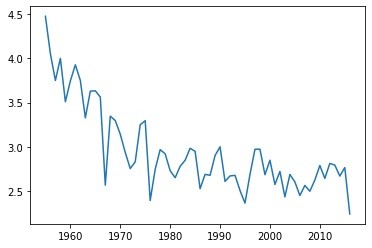

In [49]:
plt.plot(df.groupby("Year")["total_goals"].mean());
plt.show()